# Predicting Car Purchase Decisions

## About the Dataset
This dataset contains information about users and their car purchase decisions. The data was collected as part of a study to understand the factors that influence whether a user will purchase a car. The dataset includes demographic information such as the user's age, gender, and annual salary, along with whether they ultimately decided to purchase a car.

The dataset was taken from Kaggle: https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset 

## Data Dictionary

| Column Name      | Description                                                        |
|------------------|--------------------------------------------------------------------|
| `User ID`        | Unique identifier for each user.                                   |
| `Gender`         | Gender of the user (e.g., Male, Female).                           |
| `Age`            | Age of the user in years.                                          |
| `AnnualSalary`   | Annual salary of the user in dollars.                              |
| `Purchased`      | Indicates whether the user made a purchase decision (0 = No, 1 = Yes). |

## Notebook Sections
The notebook is divided into 6 parts.
1.  **Data Prep:** Import libraries, load data, and preprocess for analysis.
1.  **EDA:** Visualize and explore data to identify key patterns.
1.  **Feature Selection:** Select relevant features and prepare data for modeling.
1.  **Building a Model:** Train and evaluate a Decision Tree model.
1.  **Model Tuning:** Optimize the model with hyperparameter tuning.
1.  **Conclusion:** Summarize findings and provide recommendations.

# 1. Data Prep

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

In [2]:
# Enable inline plotting for Jupyter notebooks
%matplotlib inline

In [3]:
# Load the dataset
file_path = '../Data/car_data.csv'
car_data = pd.read_csv(file_path)

In [4]:
# Display basic dataset information
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [5]:
# Preview the first few rows of the dataset
car_data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


### Findings
-  No missing values.
-  The Gender column is a categorical variable, and we'll need to convert it into numerical format

In [6]:
# Perform one-hot encoding on the 'Gender' column, dropping the first category to avoid multicollinearity
car_data_encoded = pd.get_dummies(car_data, columns=['Gender'], drop_first=True)
car_data_encoded.head()

,User ID,Age,AnnualSalary,Purchased,Gender_Male
0,385,35,20000,0,True
1,681,40,43500,0,True
2,353,49,74000,0,True
3,895,40,107500,1,True
4,661,25,79000,0,True


# 2. EDA

## Visualize the Distribution of Variables

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


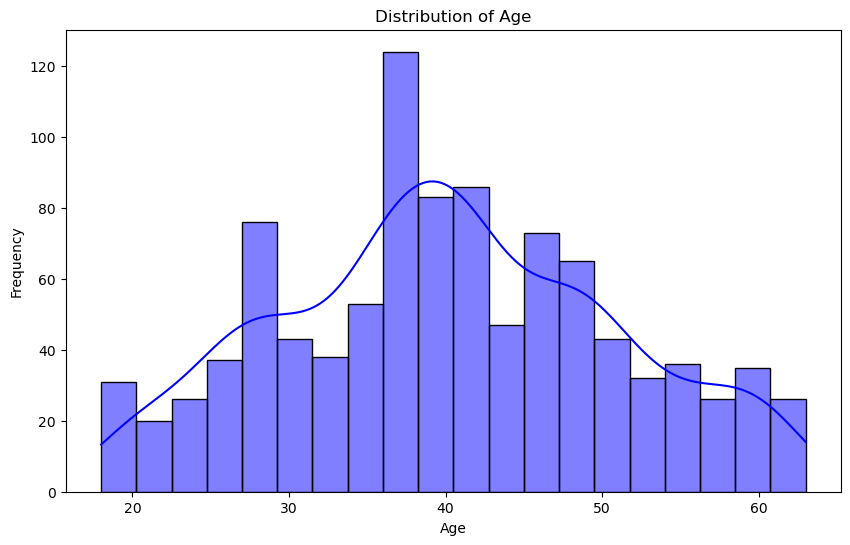

In [7]:
# Plot the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(car_data_encoded['Age'], kde=True, bins=20, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


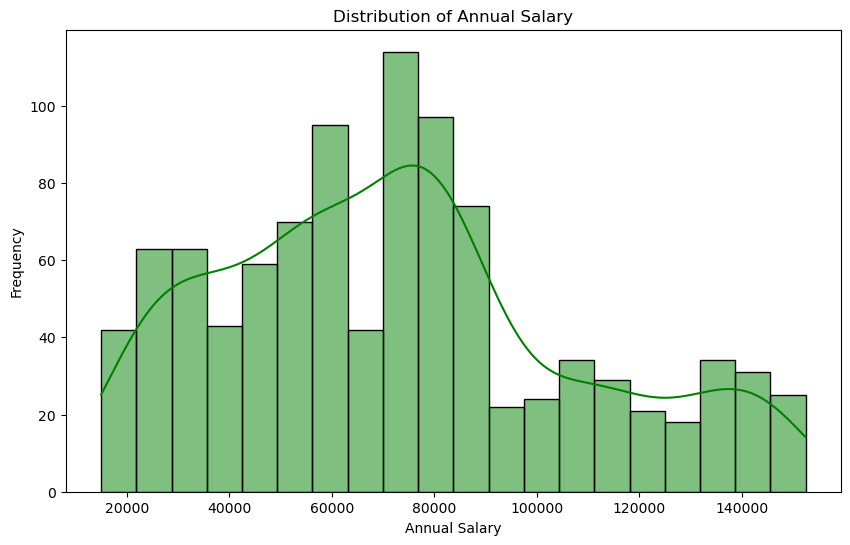

In [8]:
# Plot the distribution of 'AnnualSalary'
plt.figure(figsize=(10, 6))
sns.histplot(car_data_encoded['AnnualSalary'], kde=True, bins=20, color='green')
plt.title('Distribution of Annual Salary')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.show()

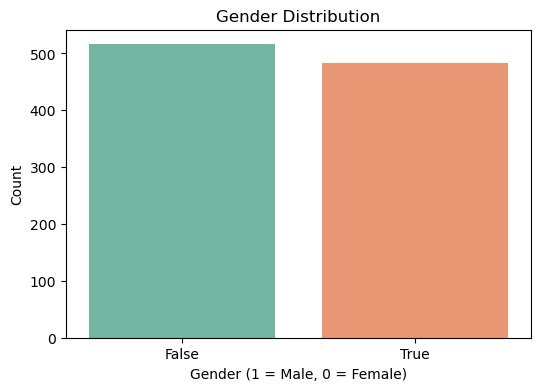

In [9]:
# Plot the distribution of 'Gender'
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender_Male', data=car_data_encoded, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.show()

## Analyze Relationships with the Target Variable

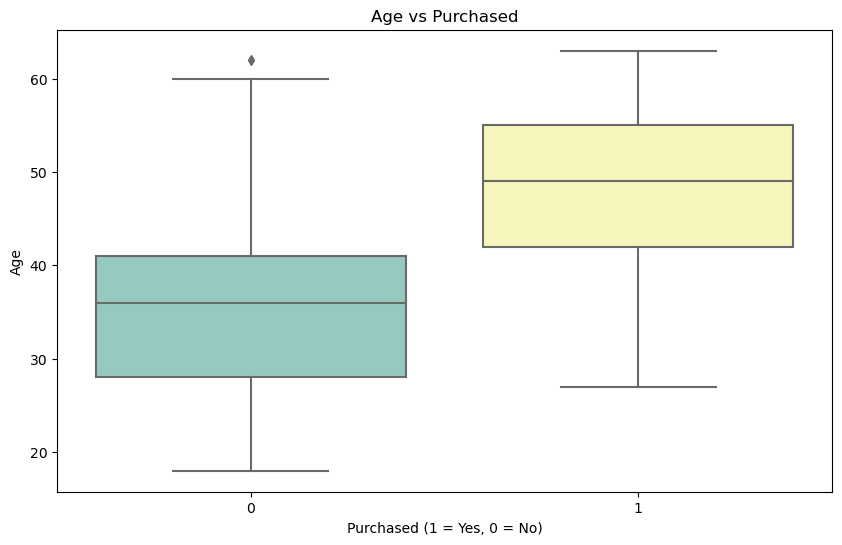

In [10]:
# Plot the relationship between 'Age' and 'Purchased'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchased', y='Age', data=car_data_encoded, palette='Set3')
plt.title('Age vs Purchased')
plt.xlabel('Purchased (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.show()

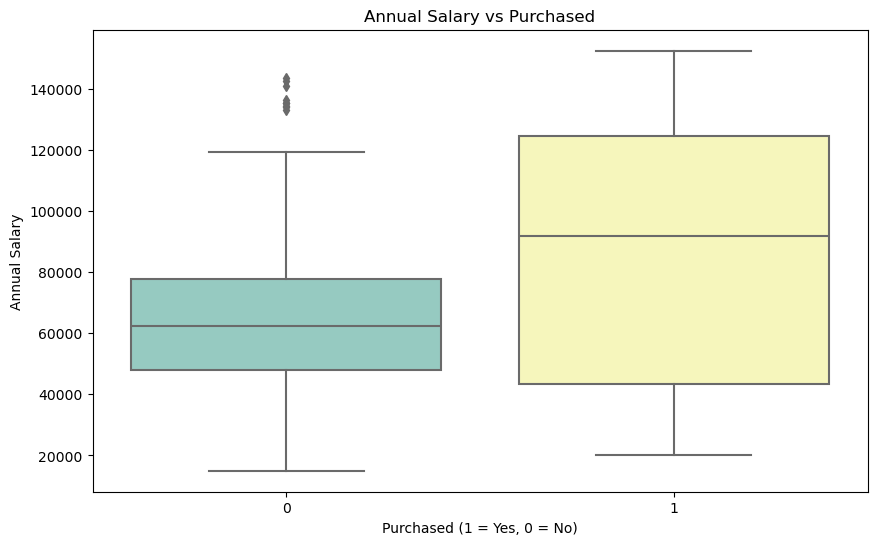

In [11]:
# Plot the relationship between 'AnnualSalary' and 'Purchased'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Purchased', y='AnnualSalary', data=car_data_encoded, palette='Set3')
plt.title('Annual Salary vs Purchased')
plt.xlabel('Purchased (1 = Yes, 0 = No)')
plt.ylabel('Annual Salary')
plt.show()

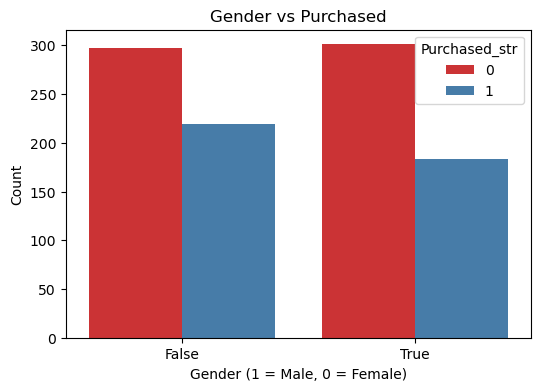

In [12]:
# Temporarily convert the 'Purchased' column to a string for plotting
car_data_encoded['Purchased_str'] = car_data_encoded['Purchased'].astype(str)

# Plot Gender vs Purchased using the temporary string column
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender_Male', hue='Purchased_str', data=car_data_encoded, palette='Set1')
plt.title('Gender vs Purchased')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.show()

# Remove the temporary string column after plotting
car_data_encoded.drop(columns=['Purchased_str'], inplace=True)

### Findings
**Distribution Findings**
-  Age: The age distribution appears fairly uniform, with clients ranging from around 20 to 60 years old.
-  Annual Salary: The salary distribution shows that most clients earn between $20,000 and $120,000 annually, with a few outliers earning significantly more.
-  Gender: The dataset is slightly skewed towards male clients.

**Relationship Findings**
-  Age vs Purchased: The box plot suggests that younger clients are less likely to purchase a car, with those in their 30s and 40s showing more purchases.
-  Annual Salary vs Purchased: Clients with higher annual salaries tend to purchase cars more frequently, indicating that income might be a strong predictor of purchasing behavior.
-  Gender vs Purchased: Males seem to purchase cars slightly more often than females, but the difference is not very pronounced.

**Key Insights from EDA**
-  Age: There's a noticeable trend where clients in their 30s and 40s are more likely to purchase a car.
-  Annual Salary: Higher income levels correlate with a higher likelihood of purchasing a car.
-  Gender: While there is a slight skew towards males purchasing more often, gender may not be the strongest predictor compared to age and salary.

These insights suggest that Age and Annual Salary are likely to be significant factors in predicting car purchases, with Gender playing a secondary role.

# 3. Feature Selection

In [13]:
# Display dataset information after encoding, for final review
car_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   User ID       1000 non-null   int64
 1   Age           1000 non-null   int64
 2   AnnualSalary  1000 non-null   int64
 3   Purchased     1000 non-null   int64
 4   Gender_Male   1000 non-null   bool 
dtypes: bool(1), int64(4)
memory usage: 32.4 KB


In [14]:
# Remove the 'User ID' column as it's not needed for modeling
car_data_final = car_data_encoded.drop(columns=['User ID'])

In [15]:
# Separate features (X) and target variable (y)
X = car_data_final.drop(columns=['Purchased'])
y = car_data_final['Purchased']

In [16]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 3), (300, 3), (700,), (300,))

# 4. Building a Model

In [18]:
# Initialize the Decision Tree Classifier with a fixed random state for reproducibility
dt_classifier = DecisionTreeClassifier(random_state=42)

In [19]:
# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
# Predict the target variable on the test data
y_pred = dt_classifier.predict(X_test)

In [21]:
# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
# Generate the confusion matrix to evaluate the performance of the classifier
conf_matrix = confusion_matrix(y_test, y_pred)
# Generate a classification report for precision, recall, and F1-score
class_report = classification_report(y_test, y_pred)
# Extract the feature importances from the trained model
feature_importances = dt_classifier.feature_importances_

In [22]:
# Output the accuracy, confusion matrix, classification report, and feature importances
accuracy, conf_matrix, class_report, feature_importances

(0.8866666666666667,
 array([[165,   7],
        [ 27, 101]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.86      0.96      0.91       172\n           1       0.94      0.79      0.86       128\n\n    accuracy                           0.89       300\n   macro avg       0.90      0.87      0.88       300\nweighted avg       0.89      0.89      0.88       300\n',
 array([0.50479707, 0.47663752, 0.01856541]))

## Findings
-  **Accuracy:** The decision tree model achieved an accuracy of approximately 88.7% on the test set.
-  **Confusion Matrix:**
    -  True Negatives (clients who did not purchase): 165
    -  False Positives (incorrectly predicted as purchasing): 7
    -  False Negatives (incorrectly predicted as not purchasing): 27
    -  True Positives (clients who purchased): 101
- **Classification:** Precision, recall, and F1-scores are good, with higher precision for clients who actually purchased (1) and higher recall for clients who did not purchase (0).
- **Feature Importance:**
    -  Age: 50.5%
    -  AnnualSalary: 47.7%
    -  Gender_Male: 1.9%
 
**Key Insights from the Model**
-  Age and AnnualSalary are the most important features in predicting whether a client purchases a car, with Age being slightly more influential.
-  Gender plays a minimal role in the prediction, indicating that the decision to purchase a car is less dependent on gender.

# 5. Model Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

## Hyperparameter Tuning

In [24]:
# Define the hyperparameter grid for tuning the Decision Tree Classifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [25]:
# Initialize GridSearchCV for hyperparameter tuning with 5-fold cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [26]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [27]:
# Extract the best hyperparameters and the best cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [28]:
# Output the best hyperparameters and best score
best_params, best_score

({'criterion': 'gini',
  'max_depth': 5,
  'max_features': None,
  'min_samples_leaf': 2,
  'min_samples_split': 10},
 0.8928571428571429)

## Train the Decision Tree with the Best Hyperparameters

In [29]:
# Re-train the Decision Tree Classifier using the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=10,
    random_state=42
)

best_dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [30]:
# Predict the target variable on the test data using the tuned model
y_pred_tuned = best_dt_classifier.predict(X_test)

In [31]:
# Calculate the accuracy of the tuned model
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
# Compare the tuned model's accuracy with the initial model's accuracy
initial_accuracy = accuracy_score(y_test, y_pred)
# Generate the confusion matrix for the tuned model
tuned_conf_matrix = confusion_matrix(y_test, y_pred_tuned)
# Generate a classification report for the tuned model
tuned_class_report = classification_report(y_test, y_pred_tuned)

In [32]:
# Output the tuned model's accuracy, initial model's accuracy, confusion matrix, and classification report
tuned_accuracy, initial_accuracy, tuned_conf_matrix, tuned_class_report

(0.9033333333333333,
 0.8866666666666667,
 array([[163,   9],
        [ 20, 108]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.89      0.95      0.92       172\n           1       0.92      0.84      0.88       128\n\n    accuracy                           0.90       300\n   macro avg       0.91      0.90      0.90       300\nweighted avg       0.90      0.90      0.90       300\n')

### Findings
**Tuned Model Accuracy**
-  90.3% (Tuned Model) vs. 88.7% (Initial Model)
-  The tuned model shows a noticeable improvement in accuracy over the initial model.
 
**Confusion Matrix**
-  The tuned model has:
    -  163 True Negatives
    -  9 False Positives
    -  20 False Negatives
    -  108 True Positives
-  Compared to the initial model, the tuned model has reduced the number of misclassifications, especially in predicting clients who did not purchase a car

**Classification Report**
-  The tuned model has slightly better precision, recall, and F1-scores across both classes (Purchased = 0 and Purchased = 1).
-  The improvement in F1-score for Purchased = 1 (clients who purchased a car) from 0.86 to 0.88 indicates that the model is better at balancing precision and recall for positive predictions.
 
**Key Insights from the Model**
-  Model Tuning Success: The tuning process has successfully enhanced the model's predictive power, making it more reliable in identifying clients who are likely to purchase a car.

# 6. Conclusion

## Key Findings
### Model Performance:
-  The initial Decision Tree model achieved an accuracy of 88.7%.
-  After hyperparameter tuning, the accuracy improved to 90.3%, indicating that the model’s predictive performance was enhanced.
=  The tuned model shows better precision, recall, and F1-scores, particularly for predicting clients who purchase a car.

### Feature Importance:
-  Age and Annual Salary are the most significant predictors of whether a client will purchase a car.
-  Age: Younger clients (in their 30s and 40s) are more likely to purchase a car.
-  Annual Salary: Higher income levels are strongly associated with the likelihood of purchasing a car.
-  Gender: While males showed a slightly higher tendency to purchase, gender is less impactful compared to age and salary.

## Recommendations
### Targeted Marketing
-  Age Group Focus: Focus marketing efforts on clients aged between 30 and 50 years, as they are more likely to purchase a car.
-  Income Segmentation: Tailor marketing campaigns towards clients with higher annual salaries (e.g., $50,000 and above), as they show a greater propensity to purchase.

### Product Offerings
-  Consider designing special offers, financing options, or packages that appeal to younger clients with high earning potential. These could include incentives like low-interest financing or premium service packages.

### Gender-Specific Campaigns:
-  While gender is a less significant factor, targeted campaigns for males might yield slight benefits. However, broad, inclusive campaigns may be more effective given the lower impact of gender.

### Additional Analysis
-  Additional models could be compared (e.g., Random Forest, Gradient Boosting) to check if there are additional insights to be gained.